<a href="https://colab.research.google.com/github/elileal/Report_Machine_Learning/blob/master/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy  as np
import seaborn as sb
import matplotlib.pyplot as pl
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

%matplotlib inline

url = "https://raw.githubusercontent.com/elileal/Report_Machine_Learning/master/wine/wine.data"

# IRIS
col_names = [
  'label', 
  'Alcohol',
  'Malic_acid',
  'Ash',
  'Alcalinity_of_ash',  
  'Magnesium',
  'Total_phenols',
  'Flavanoids',
  'Nonflavanoid_phenols',
  'Proanthocyanins',
  'Color_intensity',
  'Hue',
  'OD280_OD315_of_diluted_wines',
  'Proline'
]

feature_cols = [ 
  'Alcohol',
  'Malic_acid',
  'Ash',
  'Alcalinity_of_ash',  
  'Magnesium',
  'Total_phenols',
  'Flavanoids',
  'Nonflavanoid_phenols',
  'Proanthocyanins',
  'Color_intensity',
  'Hue',
  'OD280_OD315_of_diluted_wines',
  'Proline'
]

# Carregar base de dados
dataset = pd.read_csv(url, header=None, names=col_names)


X = dataset[feature_cols] # Atributos (Features)
y = dataset.label # Saída


In [101]:
dataset

,label,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, stratify=y) # 80% treino e 20% teste

In [0]:
from sklearn.model_selection import train_test_split
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [0]:
# Árvore de Decisão
model = tree.DecisionTreeClassifier(criterion="entropy")
model = model.fit(X_train, y_train)

## Predição e Resultados
result = model.predict(X_test)
acc = metrics.accuracy_score(result, y_test)
show_tree = round(acc * 100)

In [0]:
# KNN
def train_pred_knn(n, X_train, y_train):
  model = KNeighborsClassifier(n_neighbors=n, metric='euclidean', algorithm='brute')
  model = model.fit(X_train, y_train)
  result = model.predict(X_test)
  acc = metrics.accuracy_score(result, y_test)
  return round(acc * 100)

knn5 = train_pred_knn(5, X_train, y_train)
knn10 = train_pred_knn(10, X_train, y_train)

In [0]:
# MLP

def mlp_arc_fit(l1, l2, X_train, y_train):
  model = MLPClassifier(hidden_layer_sizes=(l1, l2), activation='tanh',max_iter=2000)
  model = model.fit(X_train, y_train)
  result = model.predict(X_test)
  acc = metrics.accuracy_score(result, y_test)
  return round(acc * 100)

# Arquitetura (4,2)
mlp42 = mlp_arc_fit(4, 2, X_train, y_train)

# Arquitetura (2, 1)
mlp21 = mlp_arc_fit(4, 2, X_train, y_train)


In [98]:
# KMeans

def kmeans_predict_test (n_clusters, atributos,categorias_comparacao):
  kmeans = KMeans(n_clusters=3, random_state=0)
  kmeans.fit_predict(atributos)
  result = kmeans.labels_
  centers = kmeans.cluster_centers_
  acc = metrics.accuracy_score(result, categorias_comparacao)
  return round(acc * 100), result, centers

# predict 

#kmeans3_dataset_train_accuracy, kmeans3_dataset_train_result = kmeans_predict_test(3,X_train,y_train)
#kmeans3_dataset_train_accuracy

#kmeans3_dataset_test_accuracy, kmeans3_dataset_test_result = kmeans_predict_test(3,X_test,y_test)
#kmeans3_dataset_test_accuracy

kmeans3_dataset_geral_accuracy, kmeans3_dataset_geral_result, kmeans3_dataset_geral_centers = kmeans_predict_test(3,X,y)
#kmeans3_dataset_geral_result
kmeans3_dataset_geral_accuracy


37.0

In [0]:
# Spectral Clustering

from sklearn.cluster import SpectralClustering

def spectral_predict_test (n_clusters, atributos,categorias_comparacao):
  model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',
                           assign_labels='kmeans')
  kmeans = KMeans(n_clusters=3, random_state=0)
  kmeans.fit_predict(atributos)
  result = model.fit_predict(X)
  centers = dict({"1": 0, "2": 0, "3": 0}) 
  acc = metrics.accuracy_score(result, categorias_comparacao)
  return round(acc * 100), result, centers



In [74]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y, kmeans3_dataset_geral_result)
mat
#sb.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
#            xticklabels=y,
#            yticklabels=y)
#pl.xlabel('true label')
#pl.ylabel('predicted label');

array([[ 0,  0,  0,  0],
       [ 0, 46, 13,  0],
       [50,  1, 20,  0],
       [19,  0, 29,  0]])

In [80]:
# Resultados
data = {'knn5': [knn5], 'knn10': [knn10], 'tree': [show_tree], 'mlp (4, 2)': [mlp42], 'mlp (2, 1)': [mlp21],'kmeans(geral)':[kmeans3_dataset_geral_accuracy]}

df = pd.DataFrame(data)
df

,knn5,knn10,tree,"mlp (4, 2)","mlp (2, 1)",kmeans(geral)
0,73.0,69.0,96.0,89.0,47.0,37.0


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


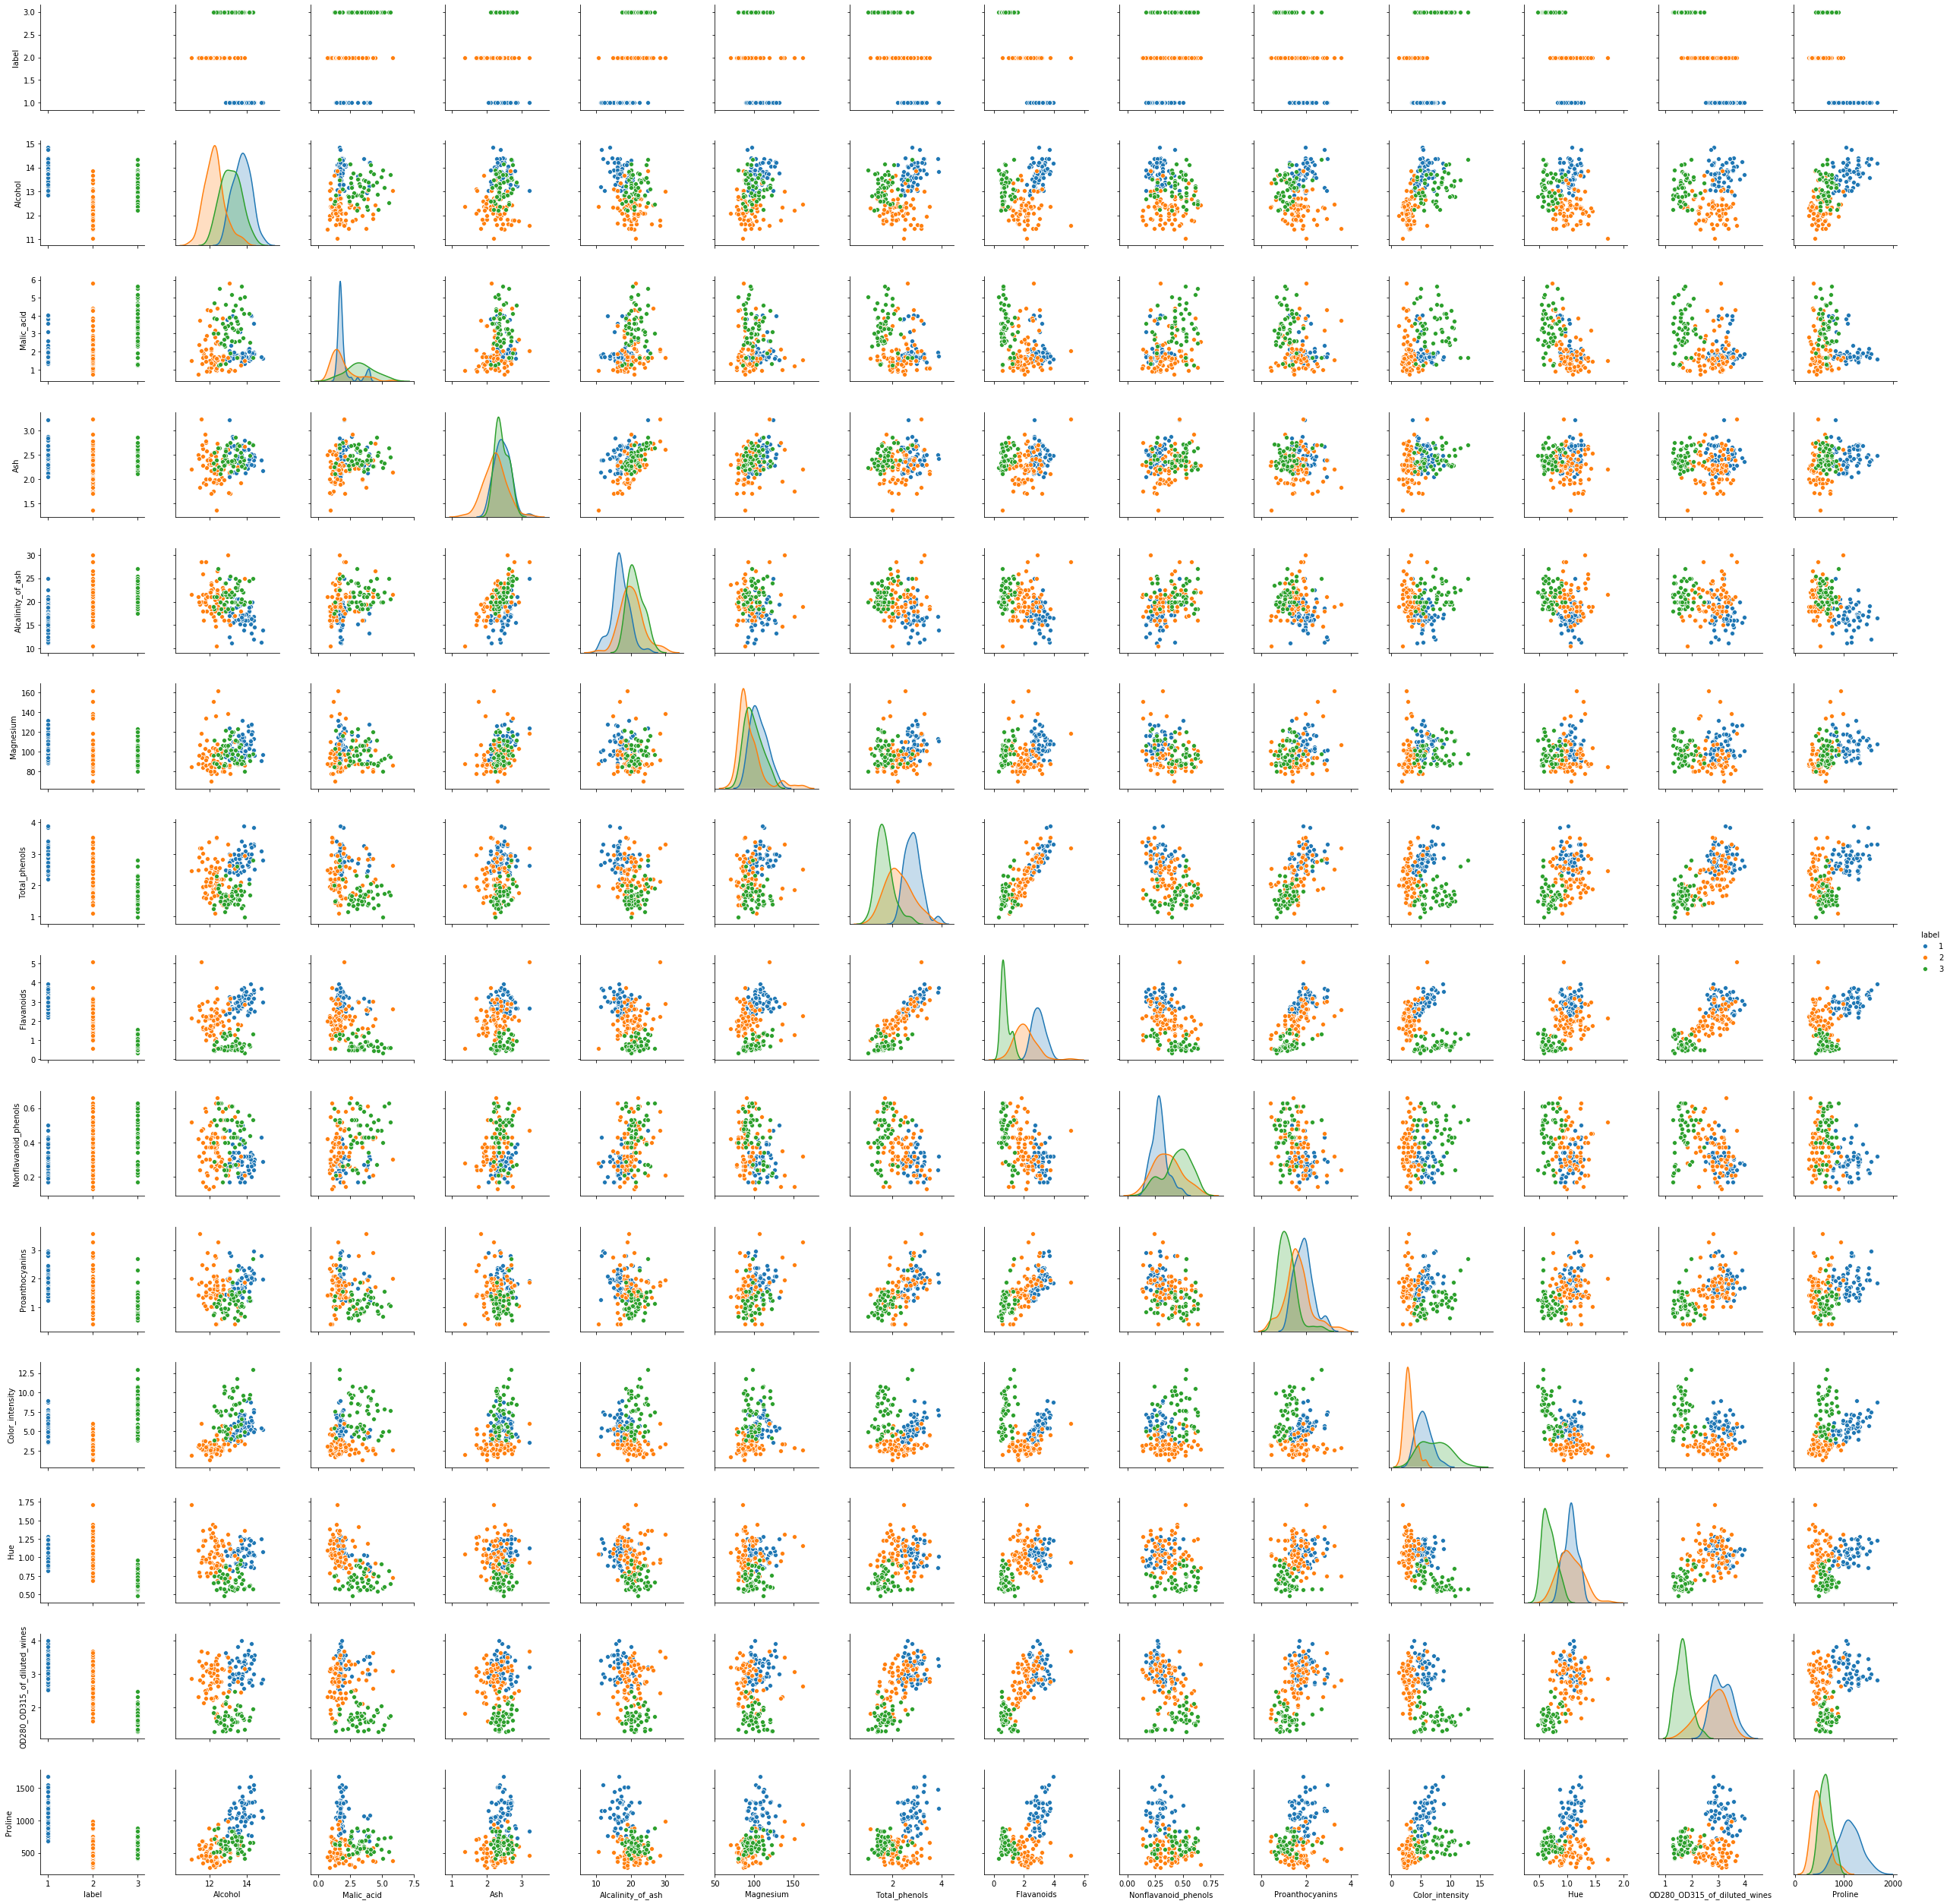

In [81]:
sb.pairplot(dataset,hue='label')

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


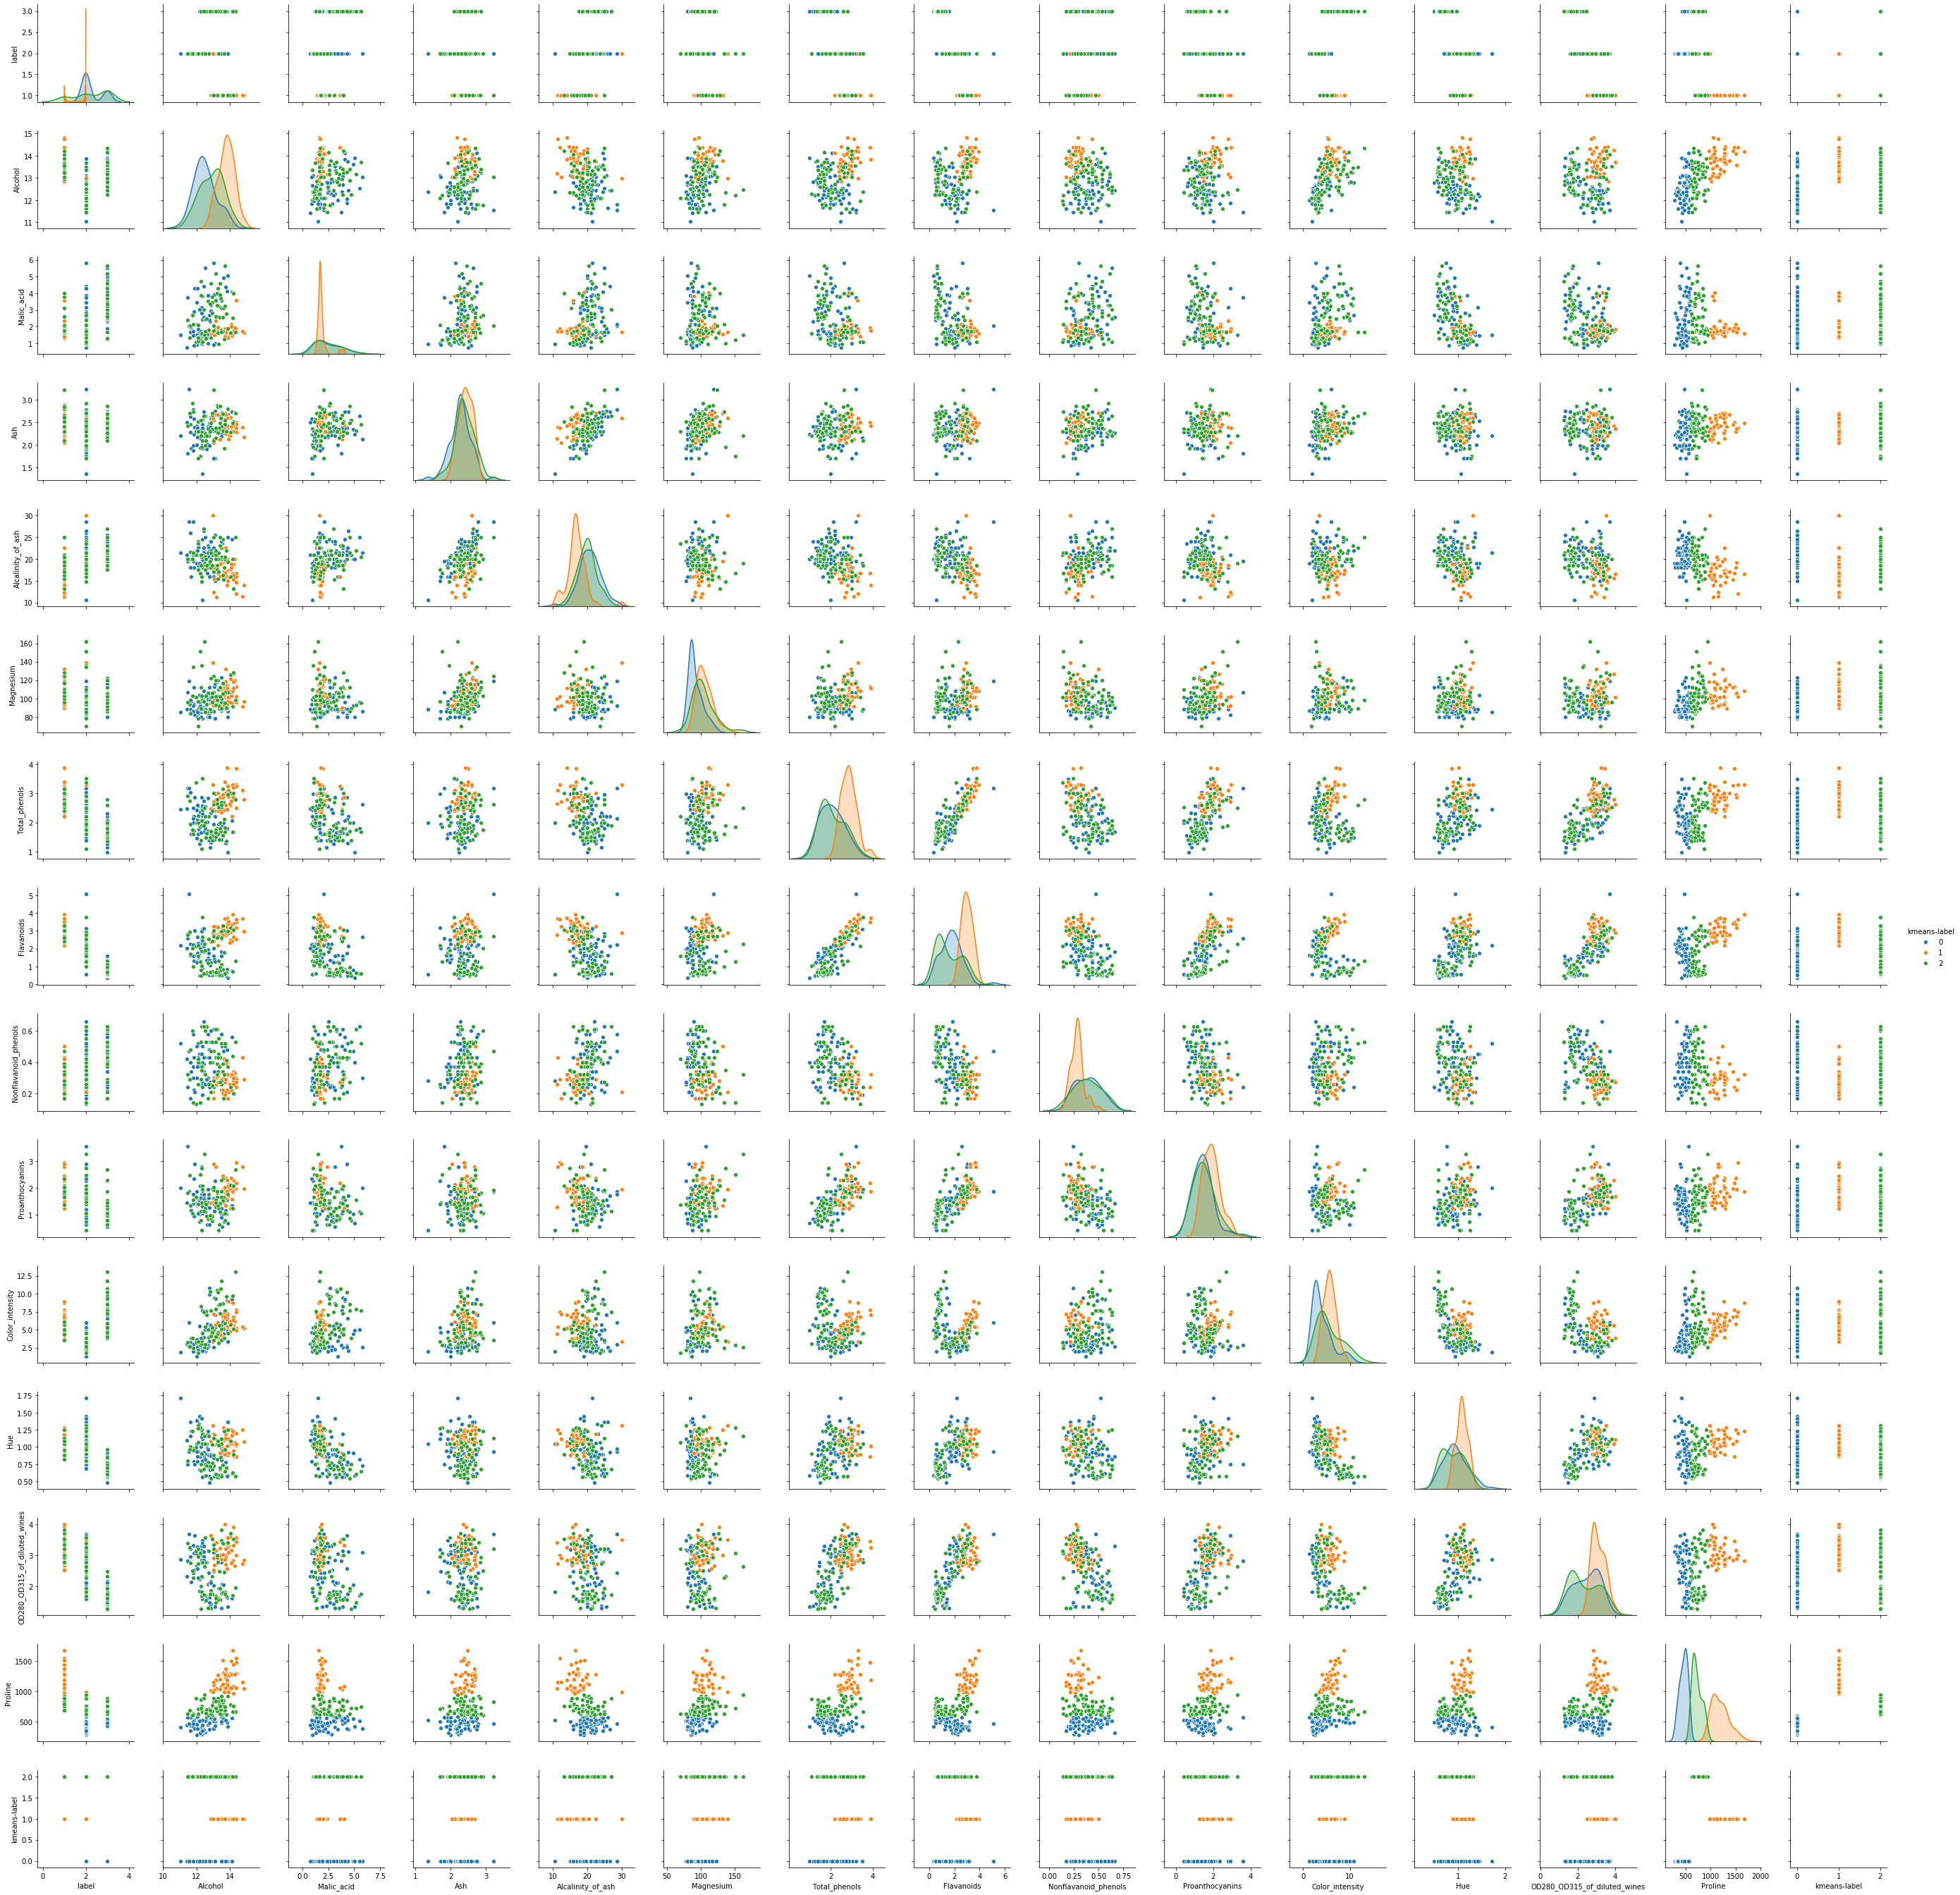

In [25]:
sb.pairplot(dataset,hue='kmeans-label')

K-means
37.0
spectral
51.0


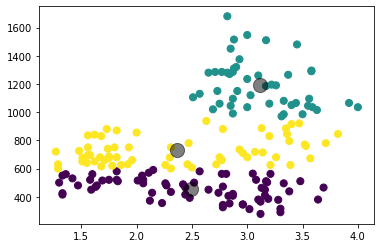

In [121]:
# teste k-means
X_df_reduzido = dataset[['OD280_OD315_of_diluted_wines','Proline']]

kmeans3_df_reduzido_accuracy, kmeans3_df_reduzido_result, kmeans3_df_reduzido_centers = kmeans_predict_test(3,X_df_reduzido,y)
print('K-means')
print(kmeans3_df_reduzido_accuracy)
pl.scatter(X_df_reduzido.iloc[:, 0], X_df_reduzido.iloc[:, 1], c=kmeans3_df_reduzido_result, s=50, cmap='viridis')
pl.scatter(kmeans3_df_reduzido_centers[:, 0], kmeans3_df_reduzido_centers[:, 1], c='black', s=200, alpha=0.5);

spectral_df_reduzido_accuracy, spectral_df_reduzido_result, spectral_df_reduzido_centers = spectral_predict_test(3,X_df_reduzido,y)
print('spectral')
print(spectral_df_reduzido_accuracy)
#pl.scatter(X_df_reduzido.iloc[:, 0], X_df_reduzido.iloc[:, 1], c=spectral_df_reduzido_result, s=50, cmap='viridis')
#pl.scatter(spectral_df_reduzido_centers[:, 0], spectral_df_reduzido_centers[:, 1], c='black', s=200, alpha=0.5);

Analise geral


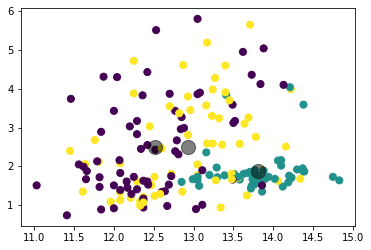

In [100]:
# analise k-means resultado geral
print("Analise geral")
pl.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans3_dataset_geral_result, s=50, cmap='viridis')
pl.scatter(kmeans3_dataset_geral_centers[:, 0], kmeans3_dataset_geral_centers[:, 1], c='black', s=200, alpha=0.5);